In [1]:
import numpy as np,pandas as pd,matplotlib.pyplot as plt,seaborn as sns

In [2]:
df=pd.read_csv('new_insurance_data.csv')
df.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [4]:
df.shape

(1338, 13)

In [5]:
df.ndim

2

In [6]:
df.size

17394

In [7]:
df.isnull().sum()

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

In [8]:
for i in df.columns:
    if(df[i].dtypes=='object'):
        df[i]=df[i].fillna(df[i].mode()[0])
    else:
        df[i]=df[i].fillna(df[i].mean())


In [11]:
df.isnull().sum()

age                                0
sex                                0
bmi                                0
children                           0
smoker                             0
Claim_Amount                       0
past_consultations                 0
num_of_steps                       0
Hospital_expenditure               0
NUmber_of_past_hospitalizations    0
Anual_Salary                       0
region                             0
charges                            0
dtype: int64

In [12]:
df.duplicated().sum()

0

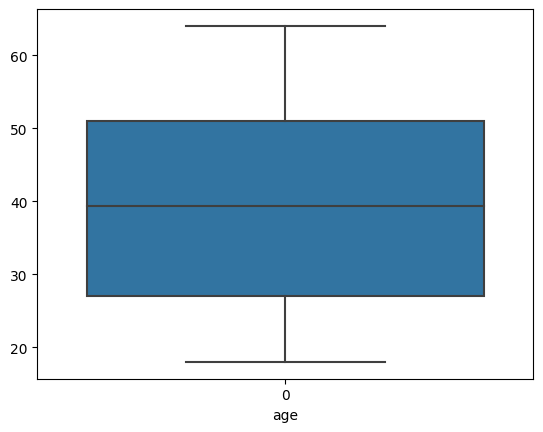

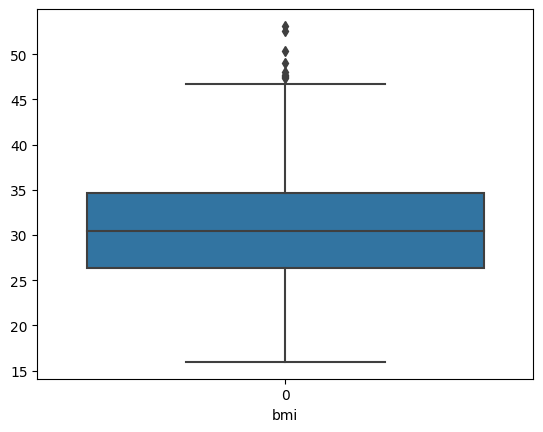

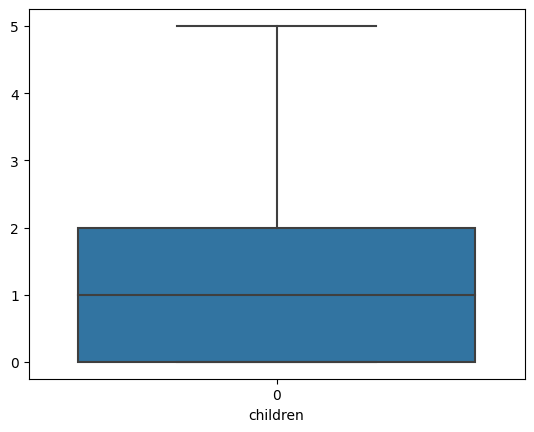

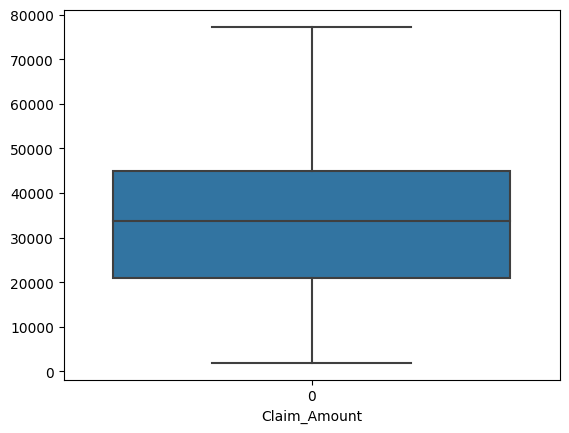

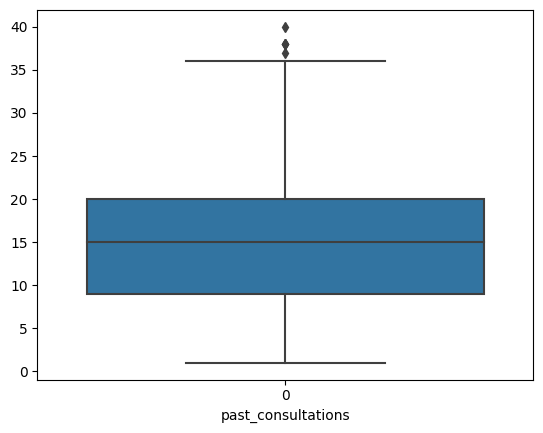

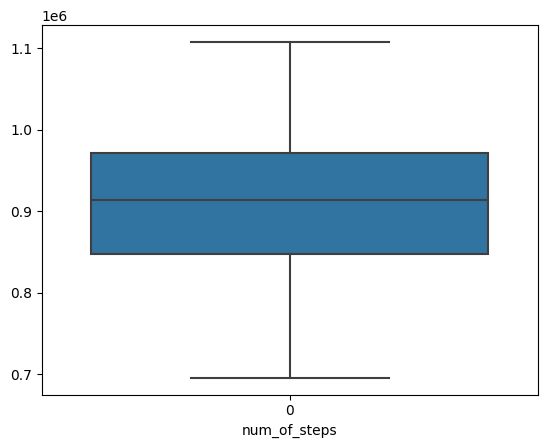

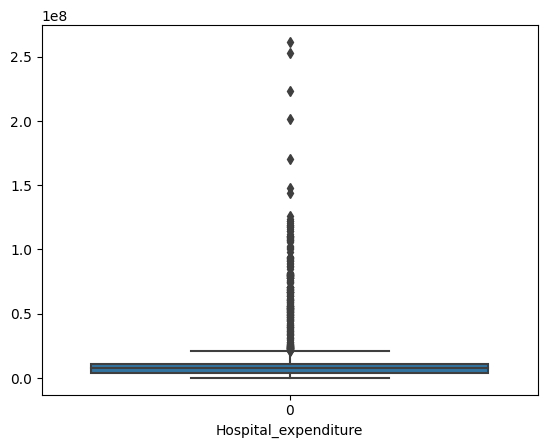

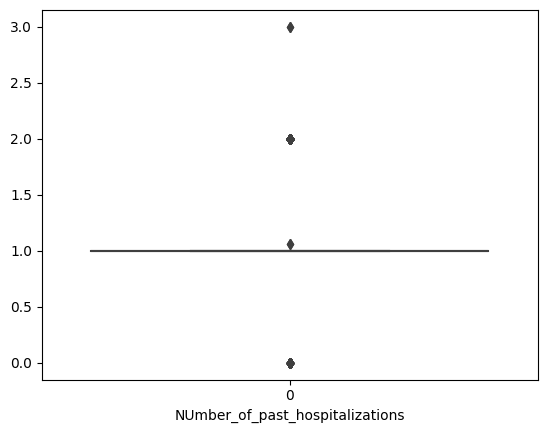

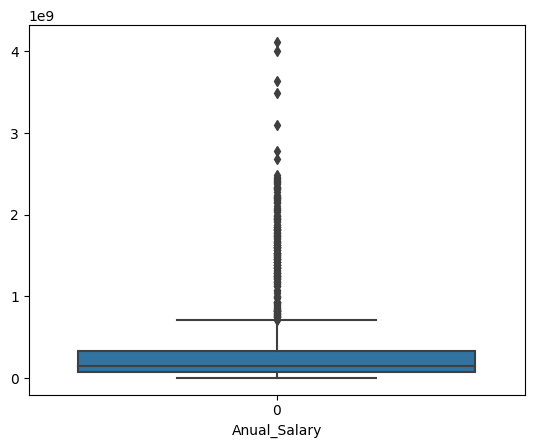

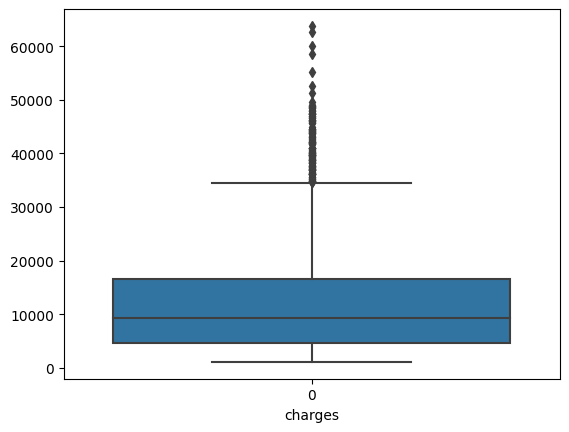

In [13]:
for i in df.columns:
    if(df[i].dtypes!='object'):
        sns.boxplot(df[i])
        plt.xlabel(i)
        plt.show()

In [14]:
out_colms=['bmi','past_consultations','Hospital_expenditure','NUmber_of_past_hospitalizations','Anual_Salary','charges']

In [15]:
for i in out_colms:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    lower=q1-1.5*iqr
    upper=q3+1.5*iqr
    df=df[(df[i]>=lower)&(df[i]<=upper)]


In [17]:
df.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
151,25.0,male,27.550,0.0,no,39148.95495,10.0,780652.0,8.614147e+06,1.0,54526009.33,northwest,2523.16950
152,22.0,female,20.235,0.0,no,41547.52536,13.0,802627.0,2.491594e+05,1.0,16718473.13,northwest,2527.81865
153,25.0,male,35.625,0.0,no,39660.60193,12.0,770773.0,3.043323e+06,1.0,48526941.68,northwest,2534.39375
154,20.0,male,31.130,2.0,no,16032.87148,7.0,769255.0,1.599069e+06,1.0,24412621.85,southeast,2566.47070
155,21.0,female,17.400,1.0,no,31090.98977,21.0,778769.0,3.015365e+06,1.0,58535788.80,southwest,2585.26900


In [18]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

In [19]:
le=LabelEncoder()
for i in df.columns:
    if(df[i].dtypes=='object'):
        df[i]=le.fit_transform(df[i])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 881 entries, 151 to 1069
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              881 non-null    float64
 1   sex                              881 non-null    int32  
 2   bmi                              881 non-null    float64
 3   children                         881 non-null    float64
 4   smoker                           881 non-null    int32  
 5   Claim_Amount                     881 non-null    float64
 6   past_consultations               881 non-null    float64
 7   num_of_steps                     881 non-null    float64
 8   Hospital_expenditure             881 non-null    float64
 9   NUmber_of_past_hospitalizations  881 non-null    float64
 10  Anual_Salary                     881 non-null    float64
 11  region                           881 non-null    int32  
 12  charges                 

In [21]:
df.region.value_counts()

region
1    229
3    224
0    221
2    207
Name: count, dtype: int64

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [33]:
cols=[]
for i in df.columns:
    if(i!='charges'):
        cols.append(i)
x1=df[cols]
vif=pd.DataFrame()
vif['Features']=x1.columns
vif['VIF_values']=[variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
vif

,Features,VIF_values
0,sex,1.776462
1,children,1.901564
2,smoker,1.389123
3,Claim_Amount,4.498577
4,past_consultations,5.328413
5,Hospital_expenditure,4.818408
6,Anual_Salary,5.991819
7,region,2.593731


In [32]:
df=df.drop(['bmi'],axis=1)

In [34]:
y=df['charges']


In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x1,y,train_size=0.8,random_state=0)

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [38]:
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
r2_score(y_test,y_pred)

0.8297314887088914

In [58]:
intercept=model.intercept_
slope=model.coef_
print(f"Model Regression point:{intercept}")
print(f"Model slope:{slope}")

Model Regression point:1423.168418682887
Model slope:[ 8.43920645e+01  4.56261680e+01 -3.13851682e+02  1.38071390e-02
  2.68759978e+01  2.34707096e-05  4.50654395e-05 -4.12258599e+01]


In [57]:
p1=min(min(y_test),min(y_pred))
p2=max(max(y_test),max(y_pred))


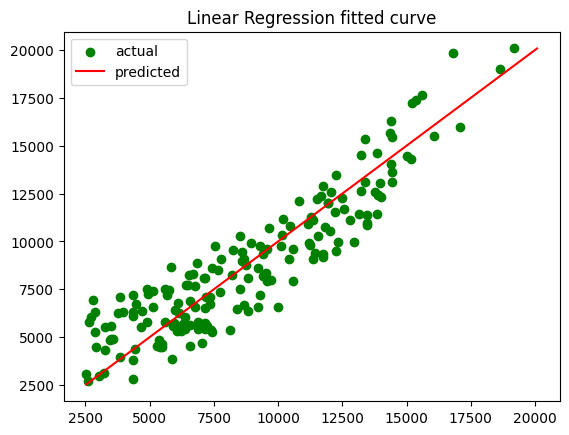

In [46]:
plt.scatter(y_test,y_pred,color='green')
plt.plot([p1,p2], [p1,p2],color='red')
plt.legend(['actual','predicted'],loc='best')
plt.title("Linear Regression fitted curve")
plt.show()

In [60]:
from sklearn.metrics import *
MSE=mean_squared_error(y_test,y_pred)
MAE=mean_absolute_error(y_test,y_pred)
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
r2_score=r2_score(y_test,y_pred)
print(f"MSE:{MSE}")
print(f"MAE:{MAE}")
print(f"RMSE:{RMSE}")
print(f"r2_score:{r2_score}")

MSE:2482979.1338584605
MAE:1309.6319910735392
RMSE:1575.7471668571898
r2_score:0.8297314887088914
